In [571]:
# basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [572]:
#load the dataset

boston = load_boston()
print(boston.keys())
data = pd.DataFrame(boston.data, columns=boston.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [573]:
# Create a target column with the dataset target

data['MEDV'] = pd.Series(boston.target)

In [574]:
#print the first five rows

data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [575]:
# check the data (exploratory analysis)
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

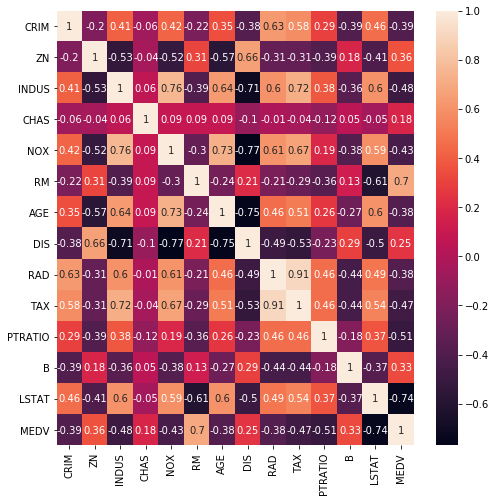

In [576]:
correlation = data.corr().round(2)
plt.figure(figsize=(8,8))
sns.heatmap(data=correlation, annot=True)

In [577]:
#investigate data.

#sns.FacetGrid(data, col='target', row='CRIM')
#plt.show()

In [578]:
### select the most important features. Some questions you can ask yourself:
#- What are the correlations?
#- Independent or dependent?
#- Does the feature have different values across the dataset?

Text(0, 0.5, 'MDEV')

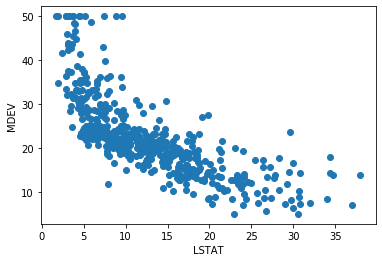

In [579]:
# as features, we want to choose variable with a strong correlation with the target.
# we can see that LSTAT and RM are highly correlated with target, so we use those 2 columns as features

features = ['LSTAT', 'RM']

# we can create scatterplot to see the relation between features and target

plt.scatter(data['LSTAT'], data['MEDV'])
plt.xlabel('LSTAT')
plt.ylabel('MDEV')

Text(0, 0.5, 'MDEV')

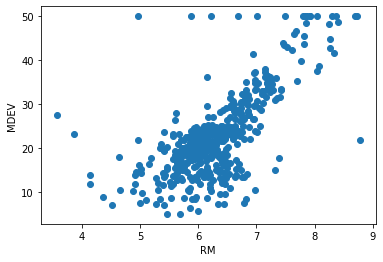

In [580]:
plt.scatter(data['RM'], data['MEDV'])
plt.xlabel('RM')
plt.ylabel('MDEV')

In [581]:
X = data[features]
y = data['MEDV']

In [582]:
# normalizing features

X = StandardScaler().fit_transform(X)

In [583]:
## split data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [584]:
## Pick one model to use, such as Linear Regression -seen in class-.

lrc = LinearRegression()
lrc.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [585]:
print(lrc.predict(X_test))
print(y_test.values)

[25.50510964 30.8592405  17.42725985 25.81325491 19.64929972 22.90317032
 16.88571841 14.61917747 22.06066668 20.03326882 17.34725148 18.15555053
 -2.53419257 22.41228621 19.92807359 26.93027912 17.16881388  3.46139894
 37.31795503 18.49325989 26.09287374 27.0359285  13.08646469 26.07395803
 19.05197872 14.34439003 22.50507619 21.09395936 17.80756143 18.90537548
 17.3189494  26.72355799 27.62430957 19.01752219 15.4809415  17.37191951
 32.8765884  22.03500171 20.02675295 25.5193256  12.24468569 28.82657024
 38.2438306  18.45117927 25.65604941 16.5588818  15.7090024  26.97797141
 19.55868547 28.94200451 20.60534552 31.33646277 17.88508649 28.36639373
 34.9844153  23.96269158 19.65312104 31.54864539 24.99070281 15.11477808
 27.10508448 32.73300584 29.58795549 18.58249363 28.64129064 10.75991895
 20.69510169 26.34948505 29.46875554 16.79445551 18.83002976 28.15270076
 13.10437033 25.07663224 23.21876915  6.6118755  22.06337978 36.66642406
 18.59482469 10.58587713 22.76126683 10.15832067 22

In [586]:
## test the accuracy and print the score with one model

print('Training Score: {}'.format(lrc.score(X_train, y_train)))
print('Testing Score: {}'.format(lrc.score(X_test, y_test)))

Training Score: 0.6501592679428922
Testing Score: 0.5739577415025859


In [591]:
# pretty low scores, let's try to pick features based on what I think will influence the price

features1 = ['CRIM', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT', 'RAD', 'CHAS', 'DIS']
X1 = data[features1]

X1 = StandardScaler().fit_transform(X1)

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, train_size=0.8, test_size=0.2, random_state=42)

lrc.fit(X1_train, y_train)

print('Training Score: {}'.format(lrc.score(X1_train, y_train)))
print('Testing Score: {}'.format(lrc.score(X1_test, y_test)))

Training Score: 0.7374213657531078
Testing Score: 0.6705273168784396
